In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_comparison

In [2]:
g = 1
v, Q = 1, 1
D0, D, tol, method = 512, 512, 1e-6, '12site'
#
ms = [0 * g]
Nas =  [(1024, 0.0625)]

data = {}

for m in ms:
    for N, a in Nas:
        dt = 1 / 16
        folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method)
        data[m, N, a, D, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()


(-82.0, -81.0)

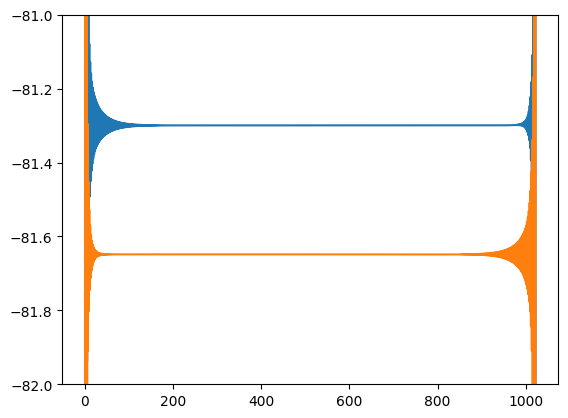

In [33]:
plt.plot(data[m, N, a, D, dt]["T00"][0, :])
plt.plot(data[m, N, a, D, dt]["T11"][0, :])
plt.ylim([-82, -81])

T00 - T00(t=0);  We might avarage over [2*l, 2*l+1] sites.


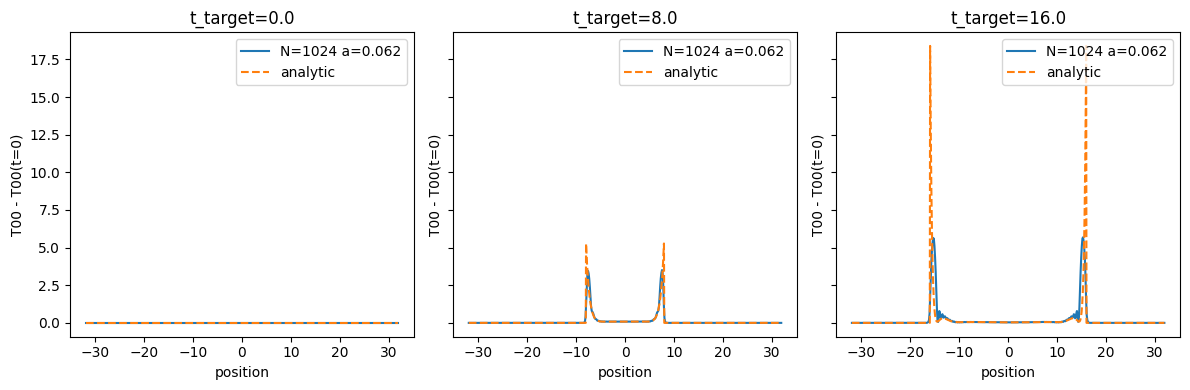

In [24]:
m = 0
plot_comparison("T00", [0, 8, 16], data, Nas, m, g, D, dt, f_analytic=fT00, subtract_t0=True, avarage_nn=True)


T11; We avarage over [2*l, 2*l+1] sites, and subtract initial value.

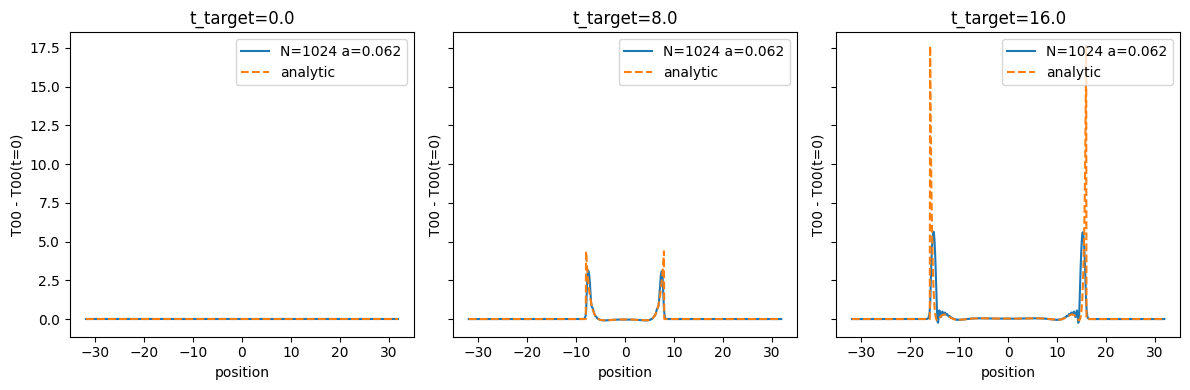

In [ ]:
m = 0
plot_comparison("T11", [0, 8, 16], data, Nas, m, g, D, dt, f_analytic=fT11, subtract_t0=True, avarage_nn=True)


T01 - T01(t=0); We can avarage over [2*l, 2*l+1] sites.

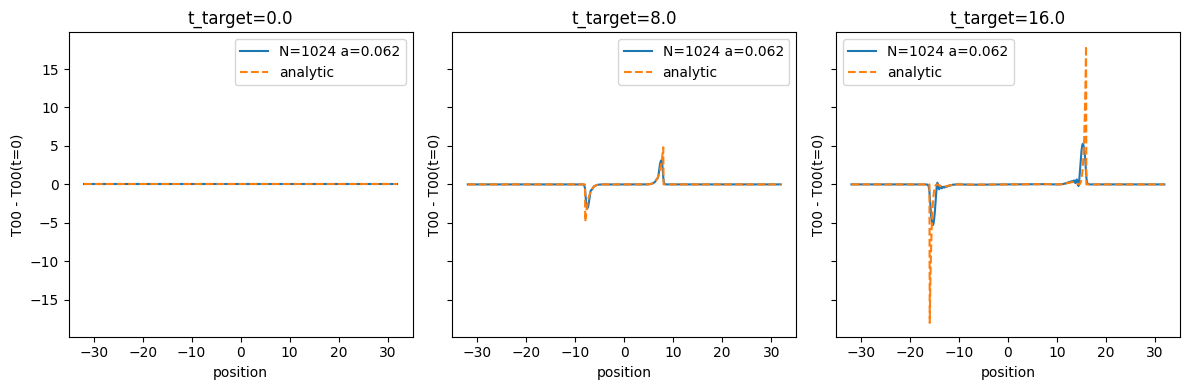

In [21]:
m = 0
plot_comparison("T01", [0, 8, 16], data, Nas, m, g, D, dt, f_analytic=fT01, subtract_t0=True, avarage_nn=True)


j0; subtract j0(t=0)

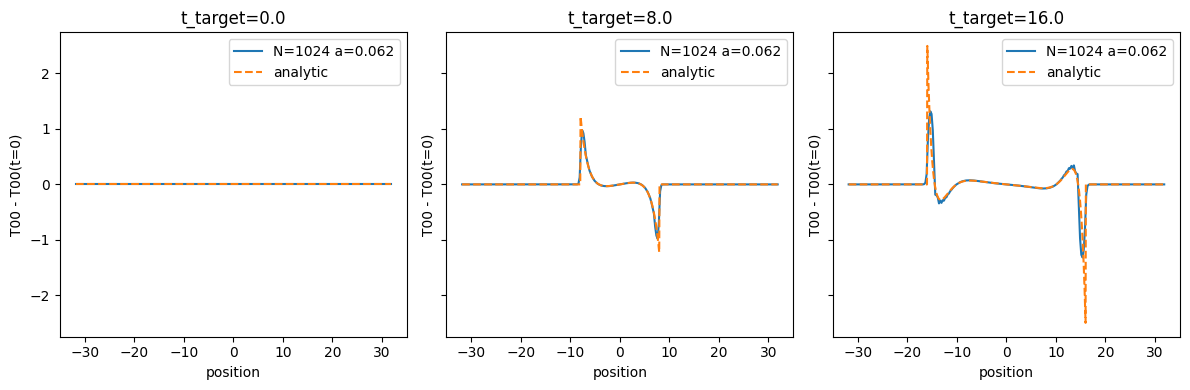

In [20]:
m = 0
plot_comparison("j0", [0, 8, 16], data, Nas, m, g, D, dt, f_analytic=fj0, subtract_t0=True, avarage_nn=True)


j1;

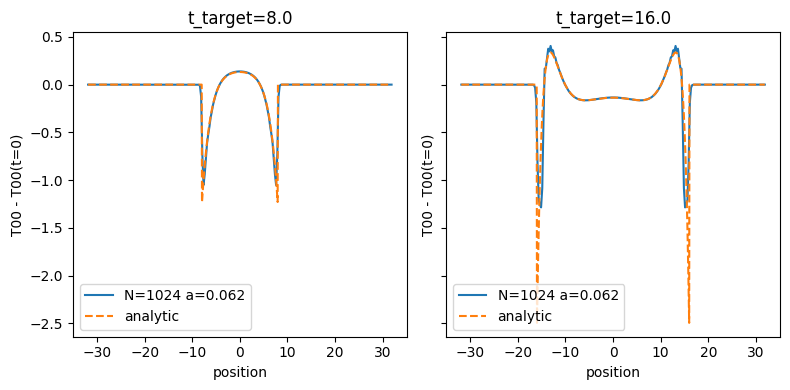

In [9]:
m = 0
plot_comparison("j1", [8, 16], data, Nas, m, g, D, dt, f_analytic=fj1, subtract_t0=True, avarage_nn=True)

condensate

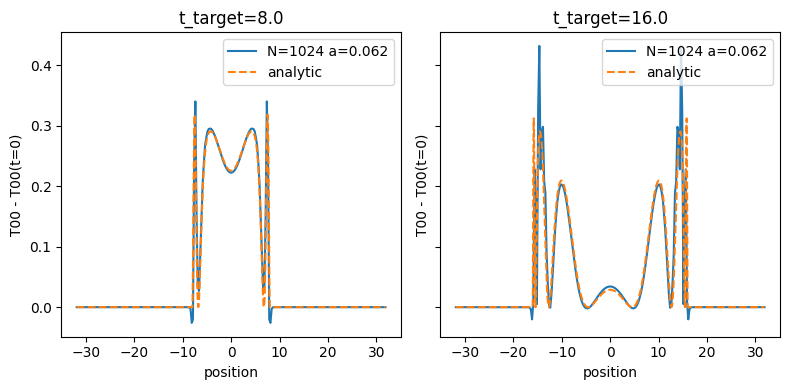

In [10]:
m = 0
plot_comparison("nu", [8, 16], data, Nas, m, g, D, dt, f_analytic=fnu, subtract_t0=True, avarage_nn=True)

Ln

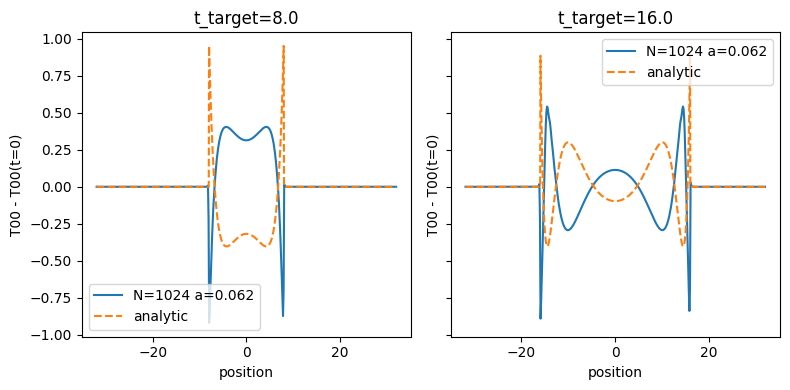

In [11]:
m = 0
plot_comparison("Ln", [8, 16], data, Nas, m, g, D, dt, f_analytic=fLn, subtract_t0=True, avarage_nn=True)


In [3]:
from run_evolution import folder_gs
import time
import yastn
import numpy as np
from yastn.tn import mps
np.seterr(all='raise')

from scripts_fermions.operators import HNN, sumLn2, measure_local_observables

In [4]:

ops = yastn.operators.SpinlessFermions(sym='U1', tensordot_policy='no_fusion')

In [21]:

a=1/16
N=256
H1 = sumLn2(N, t=0.2, a=a, v=1, Q=1, ops=ops)
H2 = sumLn2(N, t=0.2, a=a, v=0, Q=0, ops=ops)

In [22]:
(H1- H2).norm() / H1.norm()

np.float64(0.0057856197792793725)

In [16]:
H1.norm()

np.float64(4.2439309602864593e+42)

In [3]:
g=1
m=0.7
a=1/16
N=1024
D0=256
fname = folder_gs(g, m, a, N) / f"state_D={D0}.npy"
data = np.load(fname, allow_pickle=True).item()
psi = mps.load_from_dict(ops.config, data["psi"])

In [4]:
from scripts_fermions.operators import HNN, sumLn2, measure_local_observables
e0 = a * g * g / 2
snapshots = N//2

In [5]:
H0 = HNN(N, a, m, ops=ops)
Ht = lambda t: [H0, e0 * sumLn2(N, t, a, v, Q, ops=ops)]

In [7]:
v=1
Q=1
times = np.linspace(0, N * a / (2 * v), snapshots + 1)
evol = mps.tdvp_(psi, Ht, times,
                method='12site', dt=1/16,
                opts_svd={"D_total": 256, "tol": 1e-6},
                yield_initial=True, precompute=False, subtract_E=True)

In [ ]:
t1 = time.time()
for ii, step in enumerate(evol):
    print(f"{time.time() - t1}")

In [30]:
r = np.load("/home/marek/Schwinger/jffs/results_fermions/g=1.0000/m=0.5000/N=128/a=0.1250/temp/dt=0.0625/D=256/tol=1e-06/2site/results.npy", allow_pickle=True)

In [31]:
r.item()

{'entropy_1': array([[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        ,  0.47589472,  0.56315214, ...,  0.15626439,
          0.15724916, -0.        ],
        [-0.        ,  0.90634178,  1.6383615 , ...,  0.4250669 ,
          0.44083022, -0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], shape=(101, 129)),
 'entropy_2': array([[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        ,  0.22280022,  0.27465196, ...,  0.0552404 ,
          0.05582333, -0.        ],
        [-0.        ,  0.57326149,  1.0610734 , ...,  0.19335622,
          0.20365335, -0.        ],
        ...,
        [ 